https://stackoverflow.com/questions/73837058/statistics-of-one-column-of-a-dataframe-considering-another-column

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
np.random.seed(123)

In [13]:
G = nx.dorogovtsev_goltsev_mendes_graph(3)

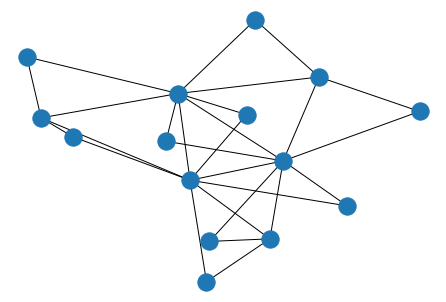

In [14]:
nx.draw(G)

In [15]:
segments = nx.to_pandas_edgelist(G)
segments

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,6
5,0,7
6,0,8
7,0,9
8,1,2
9,1,3


In [16]:
path = np.random.choice(G.nodes, 2, replace=False)

In [17]:
gen = nx.all_simple_edge_paths(G, 0, 3)

In [18]:
def generate(G, n_trips=200, ):
    for trip in range(n_trips):
        nodes = np.random.choice(G.nodes, 2, replace=True)
        paths = nx.all_simple_edge_paths(G, *nodes)
        for path in paths:
            print(path)

In [19]:
generate(G, 2)

[(9, 0), (0, 1), (1, 2), (2, 4), (4, 13)]
[(9, 0), (0, 1), (1, 2), (2, 13)]
[(9, 0), (0, 1), (1, 5), (5, 2), (2, 4), (4, 13)]
[(9, 0), (0, 1), (1, 5), (5, 2), (2, 13)]
[(9, 0), (0, 1), (1, 5), (5, 14), (14, 2), (2, 4), (4, 13)]
[(9, 0), (0, 1), (1, 5), (5, 14), (14, 2), (2, 13)]
[(9, 0), (0, 1), (1, 10), (10, 2), (2, 4), (4, 13)]
[(9, 0), (0, 1), (1, 10), (10, 2), (2, 13)]
[(9, 0), (0, 1), (1, 12), (12, 5), (5, 2), (2, 4), (4, 13)]
[(9, 0), (0, 1), (1, 12), (12, 5), (5, 2), (2, 13)]
[(9, 0), (0, 1), (1, 12), (12, 5), (5, 14), (14, 2), (2, 4), (4, 13)]
[(9, 0), (0, 1), (1, 12), (12, 5), (5, 14), (14, 2), (2, 13)]
[(9, 0), (0, 2), (2, 4), (4, 13)]
[(9, 0), (0, 2), (2, 13)]
[(9, 0), (0, 3), (3, 1), (1, 2), (2, 4), (4, 13)]
[(9, 0), (0, 3), (3, 1), (1, 2), (2, 13)]
[(9, 0), (0, 3), (3, 1), (1, 5), (5, 2), (2, 4), (4, 13)]
[(9, 0), (0, 3), (3, 1), (1, 5), (5, 2), (2, 13)]
[(9, 0), (0, 3), (3, 1), (1, 5), (5, 14), (14, 2), (2, 4), (4, 13)]
[(9, 0), (0, 3), (3, 1), (1, 5), (5, 14), (14, 2), (

In [10]:
df = pd.DataFrame(
{'id': [1, 2, 3, 4, 5, 6, 7],
 'trip_id': [11, 11, 15, 15, 15, 15, 15],
 'session_id': [1, 1, 1, 1, 2, 1, 2],
 'segment_id': [0, 3, 0, 1, 1, 2, 2]}
)

In [11]:
N = 5000
df = pd.DataFrame({
 'trip_id': np.random.choice(np.arange(200), size=N),
 'session_id': np.random.choice(np.arange(20), size=N),
 'segment_id': np.random.choice(np.arange(50), size=N)
}).sort_values(["trip_id", "session_id"]).reset_index(drop=True).reset_index().rename(columns={"index": "id"})

In [12]:
df

,id,trip_id,session_id,segment_id
0,0,0,0,17
1,1,0,0,16
2,2,0,3,48
3,3,0,4,47
4,4,0,5,41
...,...,...,...,...
4995,4995,199,16,10
4996,4996,199,18,22
4997,4997,199,18,20
4998,4998,199,18,25


In [25]:
df.groupby("trip_id")["segment_id"].count()#.plot(kind="bar")

trip_id
0      24
1      24
2      27
3      29
4      22
       ..
195    24
196    24
197    25
198    20
199    25
Name: segment_id, Length: 200, dtype: int64